In [1]:
import os

from einops import rearrange
from shapely import Polygon, MultiPolygon
from matplotlib import colormaps
import numpy as np
import rasterio
import skimage
import matplotlib.pyplot as plt
import seaborn as sns

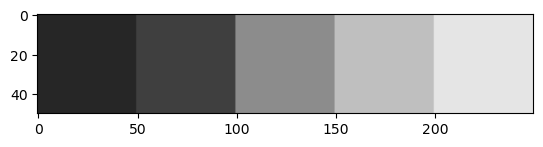

In [29]:
COLORS = np.asarray([.15, .25, .55, .75, .9])

n = 50
blocks = []
for c in COLORS:
    blocks.append(np.full((n, n, 3), c))
blocks = np.concat(blocks, axis=1)
plt.imshow(blocks)

In [33]:
rgb = skimage.io.imread('/Users/erikstorrs/Downloads/image1.png')[..., :-1]
gray = skimage.color.rgb2gray(rgb)
gray = rearrange(np.stack([gray, gray, gray]), 'c h w -> h w c')
gray.shape

(4776, 3336, 3)

In [34]:
gray.max()

np.float64(1.0)

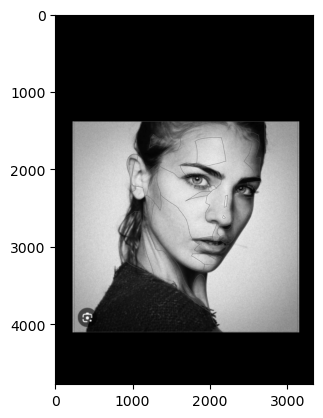

In [35]:
plt.imshow(gray)

In [36]:
img = skimage.io.imread('/Users/erikstorrs/Downloads/image0.png')
img.shape

(4776, 3336, 4)

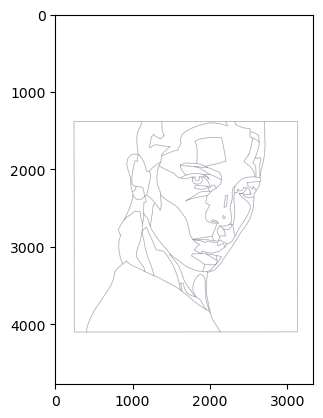

In [37]:
plt.imshow(img)

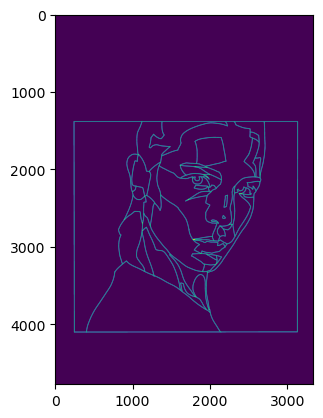

In [38]:
img = img[..., -1]>0
plt.imshow(img)

In [39]:
from rasterio.features import shapes
def shapely_from_mask(mask):
    objs = shapes(mask.astype(np.int16), mask=mask > 0)
    p = next(iter(objs))
    coordinates = p[0]['coordinates']

    if len(coordinates) == 1:
        poly = Polygon(coordinates[0])
    else:
        poly = Polygon(shell=coordinates[0], holes=coordinates[1:])

    return poly

In [40]:
meshes = np.stack(np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]), indexing='ij'))
pts = rearrange(meshes, 'c h w -> (h w) c')
pts = pts[np.random.permutation(pts.shape[0])]

polys = []
masks = []
while True:
    mask = None
    for pt in pts:
        mask = skimage.segmentation.flood(img, tuple(pt))
        poly = shapely_from_mask(np.flip(mask, 0))
        polys.append(poly)
        masks.append(mask)
        break

    keep = ~mask[pts[:, 0], pts[:, 1]]
    pts = pts[keep]
    print(pts.shape)

    if not len(pts):
        break
        

(13896378, 2)
(13855656, 2)
(5768288, 2)
(4178882, 2)
(4111133, 2)
(3181499, 2)
(2549234, 2)
(2283053, 2)
(2130238, 2)
(1799387, 2)
(1480249, 2)
(1451346, 2)
(1415690, 2)
(1403589, 2)
(1378606, 2)
(1246413, 2)
(1175782, 2)
(1060370, 2)
(1013644, 2)
(875686, 2)
(867193, 2)
(849237, 2)
(841309, 2)
(838135, 2)
(830736, 2)
(770263, 2)
(608254, 2)
(581143, 2)
(510231, 2)
(464809, 2)
(407534, 2)
(402173, 2)
(376471, 2)
(320972, 2)
(251193, 2)
(215318, 2)
(199229, 2)
(185223, 2)
(183969, 2)
(175628, 2)
(165254, 2)
(127972, 2)
(103327, 2)
(83278, 2)
(67771, 2)
(65730, 2)
(60157, 2)
(53999, 2)
(45250, 2)
(41051, 2)
(36360, 2)
(26630, 2)
(24167, 2)
(9969, 2)
(6652, 2)
(5823, 2)
(1191, 2)
(668, 2)
(2, 2)
(0, 2)


In [41]:
scene = MultiPolygon(polys)

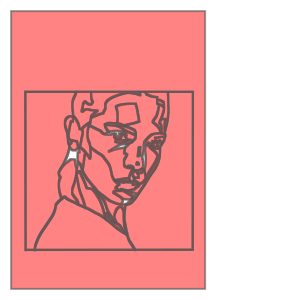

In [42]:
scene

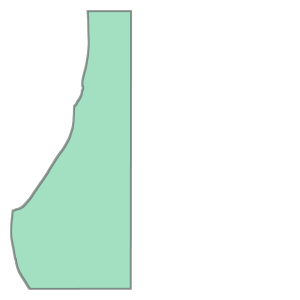

In [43]:
p = polys[0]
p

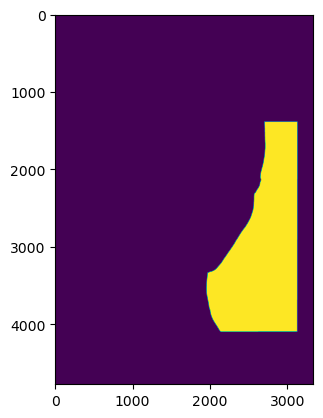

In [44]:
plt.imshow(masks[0])

In [45]:
colors = []
for mask in masks:
    avg = gray[mask].mean()
    deltas = np.abs(COLORS - avg)
    color = COLORS[deltas.argmin()]
    colors.append(color)

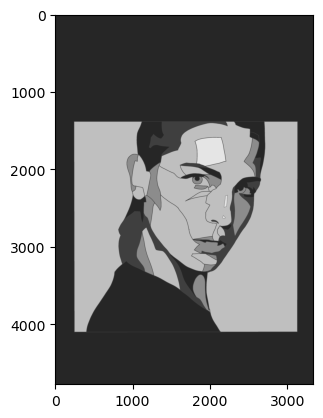

In [46]:
blank = np.zeros_like(gray)
for mask, color in zip(masks, colors):
    blank[mask] = [color] * 3
plt.imshow(blank)

In [52]:
for c in COLORS:
    val = int(c * 255) 
    print('#%02x%02x%02x' % (val, val, val))

#262626
#3f3f3f
#8c8c8c
#bfbfbf
#e5e5e5


In [56]:
import re
svg_str = scene._repr_svg_()
head = re.sub(r'^(<svg[^>]+>).*$', r'\1', svg_str)
head += '<g>'

for poly, color in zip(polys, colors):
    val = int(color * 255)
    head += poly.svg(fill_color='#%02x%02x%02x' % (val, val, val), opacity=1.)

head += '</g></svg>'

svg_str

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="300" height="300" viewBox="-191.04 -191.04 3718.08 5158.08" preserveAspectRatio="xMinYMin meet"><g transform="matrix(1,0,0,-1,0,4776.0)"><g><path fill-rule="evenodd" fill="#ff3333" stroke="#555555" stroke-width="34.3872" opacity="0.6" d="M 2135.0,675.0 L 2135.0,676.0 L 2134.0,676.0 L 2134.0,677.0 L 2133.0,677.0 L 2133.0,678.0 L 2132.0,678.0 L 2132.0,679.0 L 2131.0,679.0 L 2131.0,680.0 L 2130.0,680.0 L 2130.0,681.0 L 2129.0,681.0 L 2129.0,682.0 L 2128.0,682.0 L 2128.0,683.0 L 2127.0,683.0 L 2127.0,684.0 L 2126.0,684.0 L 2126.0,685.0 L 2125.0,685.0 L 2125.0,686.0 L 2124.0,686.0 L 2124.0,688.0 L 2123.0,688.0 L 2123.0,689.0 L 2122.0,689.0 L 2122.0,690.0 L 2121.0,690.0 L 2121.0,692.0 L 2120.0,692.0 L 2120.0,694.0 L 2119.0,694.0 L 2119.0,695.0 L 2118.0,695.0 L 2118.0,697.0 L 2117.0,697.0 L 2117.0,698.0 L 2116.0,698.0 L 2116.0,700.0 L 2115.0,700.0 L 2115.0,702.0 L 2114.0,702.0 L 2114.0,703.0 L 2113.0,70

In [57]:
with open('/Users/erikstorrs/Downloads/test.svg', 'w') as f:
    f.write(head)